In [8]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
csv_filename = r'C:\Users\mattr\OneDrive\Python Projects\championsdata.csv'
csv_filename2 = r'C:\Users\mattr\OneDrive\Python Projects\runnerupsdata.csv'

In [10]:
nba_champs = pd.read_csv(csv_filename)
nba_rps = pd.read_csv(csv_filename2)

In [11]:
subset_columns = ['Year','Game','Win','Home','FG','FGA','FGP','TP','TPA','TPP',
'FT','FTA','FTP','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']

nba_champs_copy = nba_champs[subset_columns]
nba_rps_copy = nba_rps

In [12]:
nba_champs_copy.head()

,Year,Game,Win,Home,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,1,1,1,48,89,0.539,0,0,NaN,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,2,0,1,48,95,0.505,0,1,0.0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,3,1,0,44,92,0.478,0,1,0.0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,4,0,0,44,93,0.473,0,0,NaN,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,5,1,1,41,91,0.451,0,0,NaN,...,0.788,19,37,56,28,7,6,21,27,108


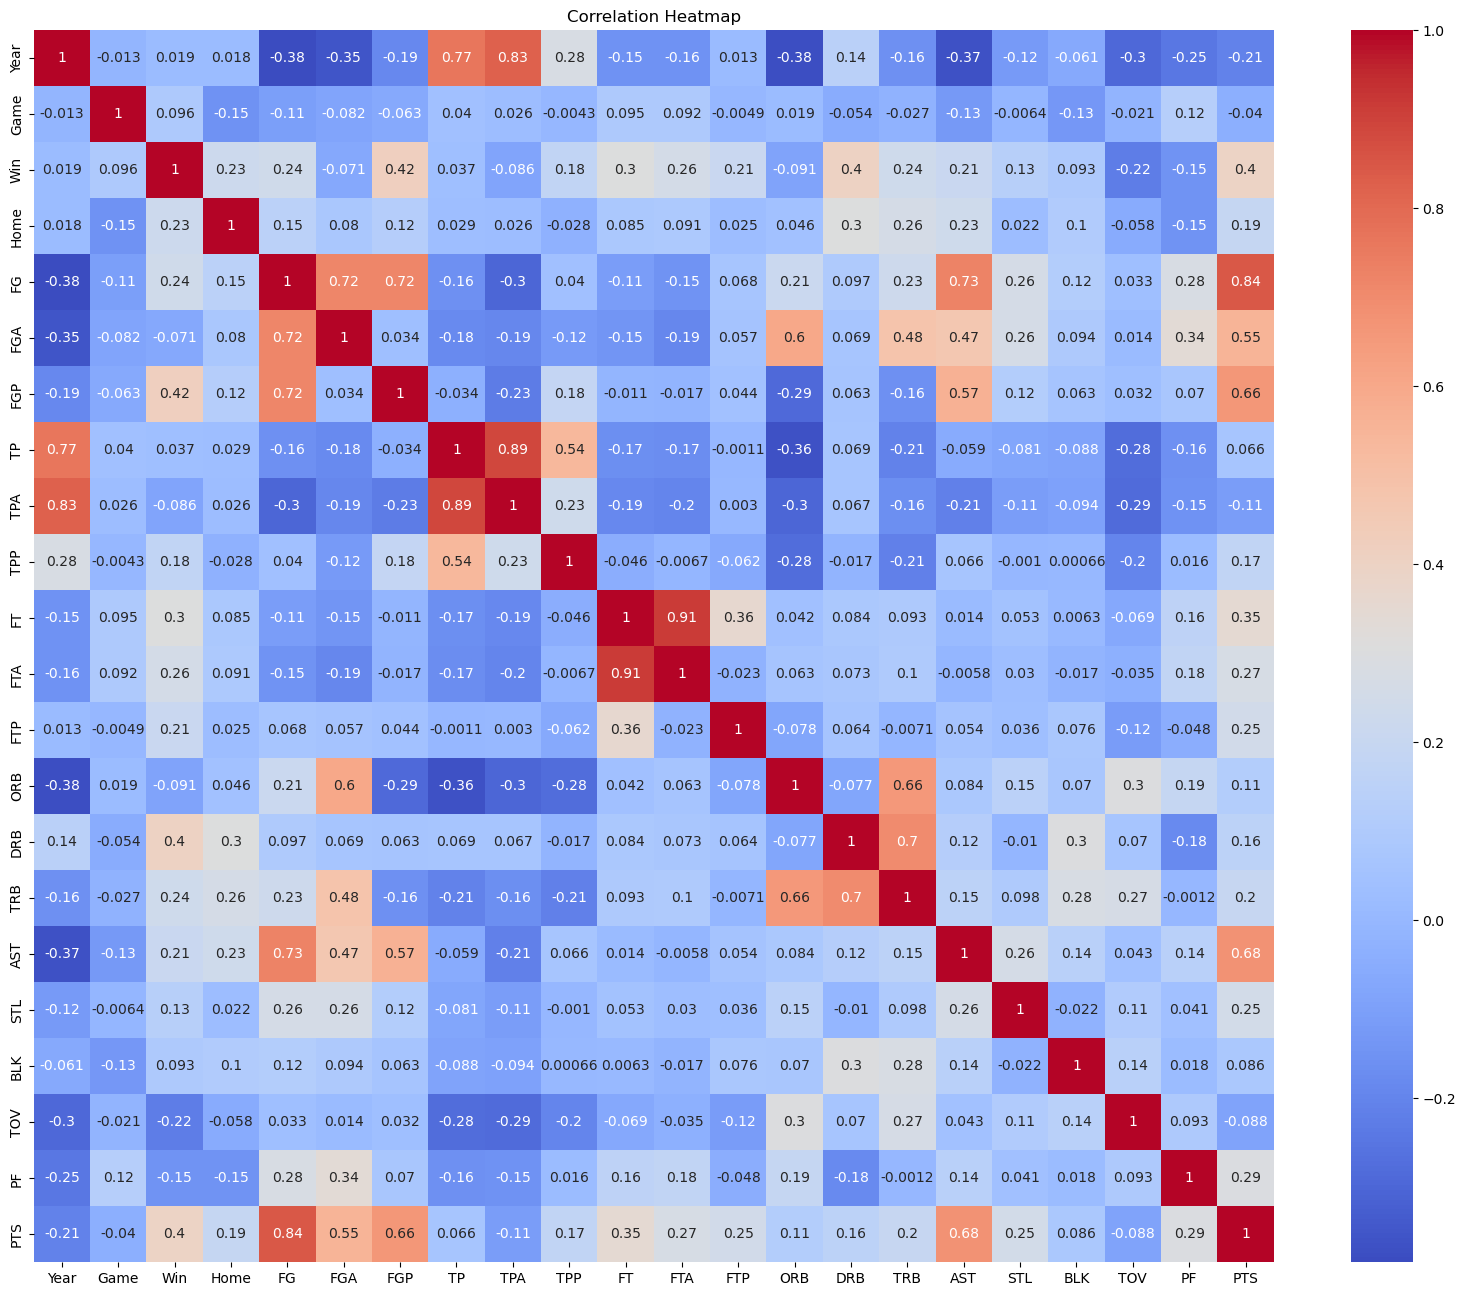

In [13]:
correlation_matrix = nba_champs_copy.corr()

annot_font_size = 40
# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\mattr\AppData\Local\Temp\ipykernel_16884\2026380117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_champs_copy['PTSBin'] = pd.cut(nba_champs_copy['PTS'], bins=bins, labels=labels)


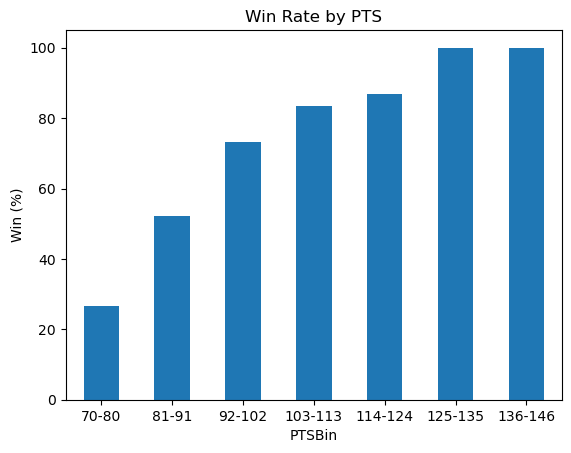

In [14]:
bins = [70, 81, 92, 103, 114, 125, 136, 147]
labels = ['70-80','81-91','92-102','103-113','114-124','125-135','136-146']

nba_champs_copy['PTSBin'] = pd.cut(nba_champs_copy['PTS'], bins=bins, labels=labels)
survival_rate = nba_champs_copy.groupby('PTSBin')['Win'].mean() * 100

survival_rate.plot(kind='bar')
plt.ylabel('Win (%)')
plt.title('Win Rate by PTS')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='DRB'>

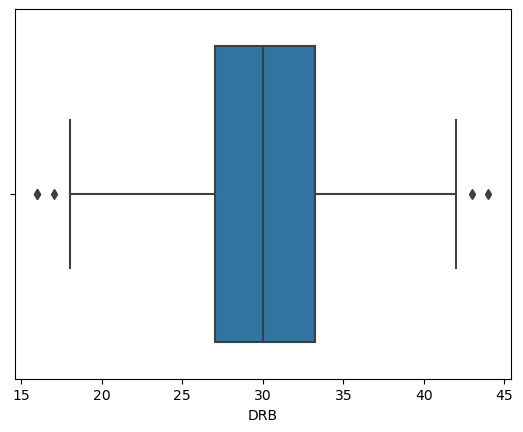

In [15]:
sns.boxplot(x = 'DRB', data = nba_champs_copy)

C:\Users\mattr\AppData\Local\Temp\ipykernel_16884\2243147060.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_champs_copy['DRBBin'] = pd.cut(nba_champs_copy['DRB'], bins=bins, labels=labels)


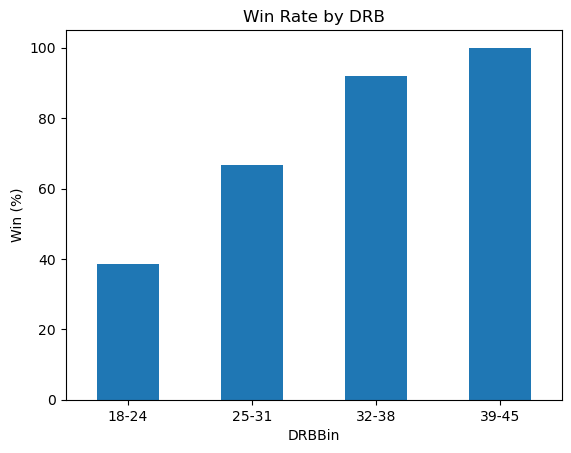

In [16]:
bins = [18, 25, 32, 39, 46]
labels = ['18-24','25-31','32-38','39-45']

nba_champs_copy['DRBBin'] = pd.cut(nba_champs_copy['DRB'], bins=bins, labels=labels)
survival_rate = nba_champs_copy.groupby('DRBBin')['Win'].mean() * 100

survival_rate.plot(kind='bar')
plt.ylabel('Win (%)')
plt.title('Win Rate by DRB')
plt.xticks(rotation=0)
plt.show()

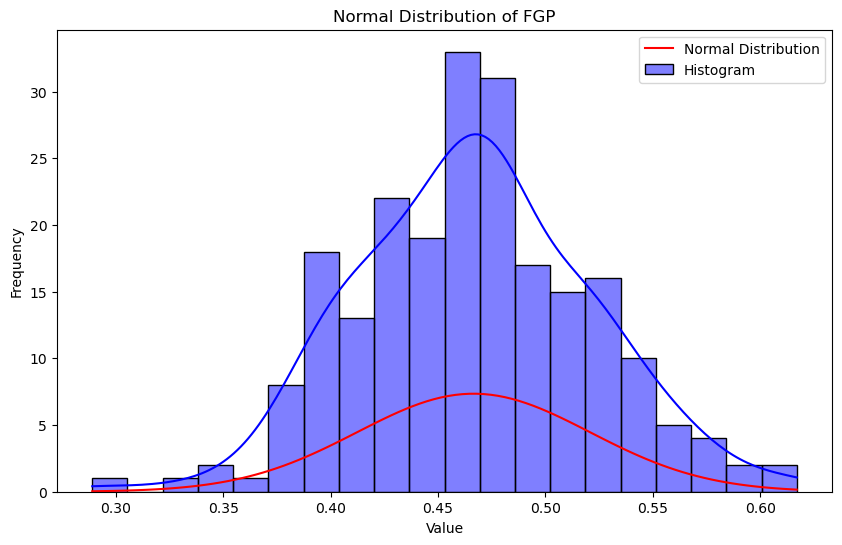

In [17]:
from scipy.stats import norm

column_data = nba_champs_copy['FGP']

# Calculate mean and standard deviation of the column
mean = column_data.mean()
std_dev = column_data.std()

# Create a histogram of the column's data
plt.figure(figsize=(10, 6))
sns.histplot(column_data, bins=20, kde=True, color='blue', label='Histogram')

# Create a normal distribution curve
x = np.linspace(min(column_data), max(column_data), 100)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, 'r', label='Normal Distribution')

plt.title('Normal Distribution of FGP')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\mattr\AppData\Local\Temp\ipykernel_16884\3863455361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_champs_copy['FGPBin'] = pd.cut(nba_champs_copy['FGP'], bins=bins, labels=labels)


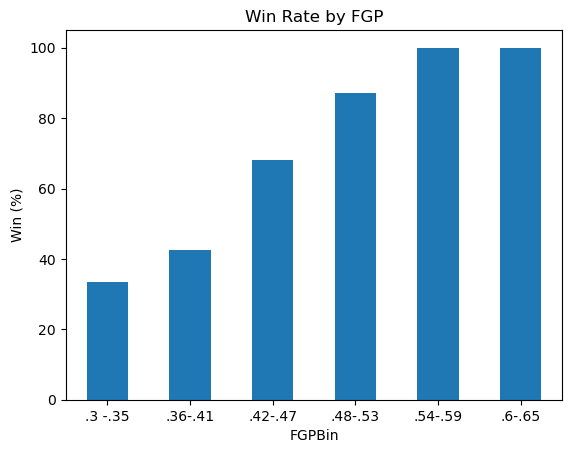

In [18]:
bins = [.3, .36, .42, .48, .54, .6, .66]
labels = ['.3 -.35', '.36-.41','.42-.47','.48-.53','.54-.59','.6-.65']

nba_champs_copy['FGPBin'] = pd.cut(nba_champs_copy['FGP'], bins=bins, labels=labels)
survival_rate = nba_champs_copy.groupby('FGPBin')['Win'].mean() * 100

survival_rate.plot(kind='bar')
plt.ylabel('Win (%)')
plt.title('Win Rate by FGP')
plt.xticks(rotation=0)
plt.show()

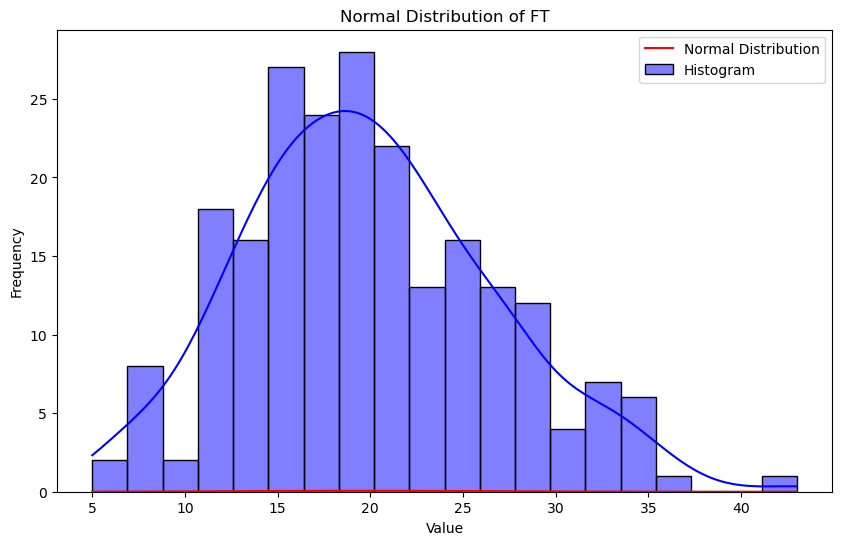

In [19]:
from scipy.stats import norm

column_data = nba_champs_copy['FT']

# Calculate mean and standard deviation of the column
mean = column_data.mean()
std_dev = column_data.std()

# Create a histogram of the column's data
plt.figure(figsize=(10, 6))
sns.histplot(column_data, bins=20, kde=True, color='blue', label='Histogram')

# Create a normal distribution curve
x = np.linspace(min(column_data), max(column_data), 100)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, 'r', label='Normal Distribution')

plt.title('Normal Distribution of FT')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\mattr\AppData\Local\Temp\ipykernel_16884\3455261372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_champs_copy['FTBin'] = pd.cut(nba_champs_copy['FT'], bins=bins, labels=labels)


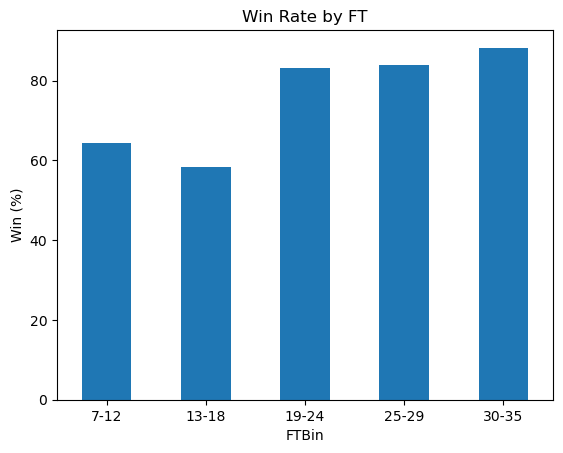

In [20]:
bins = [7, 13, 19, 25, 30, 36]
labels = ['7-12', '13-18','19-24','25-29','30-35']

nba_champs_copy['FTBin'] = pd.cut(nba_champs_copy['FT'], bins=bins, labels=labels)
survival_rate = nba_champs_copy.groupby('FTBin')['Win'].mean() * 100

survival_rate.plot(kind='bar')
plt.ylabel('Win (%)')
plt.title('Win Rate by FT')
plt.xticks(rotation=0)
plt.show()

In [21]:
### LOGISTIC REGRESSION USING PTS, FGP, DRB, FT

In [22]:
X = nba_champs_copy[['PTS','FGP','DRB', 'FT']].values
y = nba_champs_copy['Win'].values

In [23]:
print(y.shape)

(220,)


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


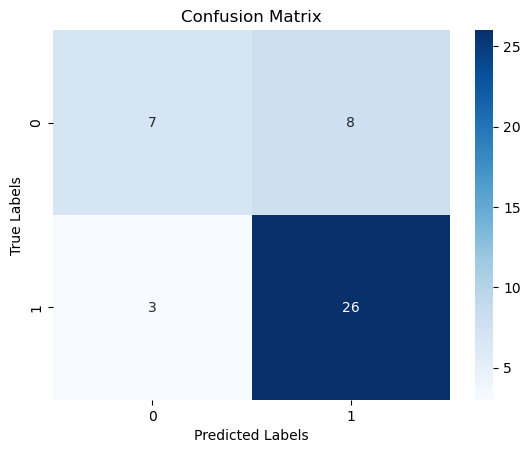

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [29]:
### LOGISTIC REGRESSION USING PTS, FGP, DRB

In [30]:
X = nba_champs_copy[['PTS','FGP','DRB']].values
y = nba_champs_copy['Win'].values

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [33]:
model2.fit(X_train, y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


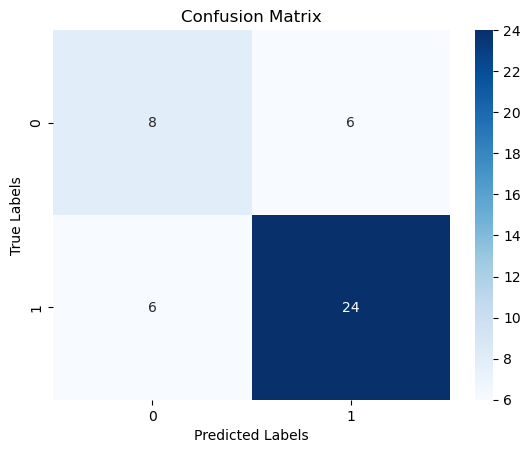

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [36]:
### LOGISTIC REGRESSION USING PTS, FGP, DRB, TOV

In [37]:
X = nba_champs_copy[['PTS','FGP','DRB', 'FT', 'TOV']].values
y = nba_champs_copy['Win'].values

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

In [40]:
model3.fit(X_train, y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7727272727272727


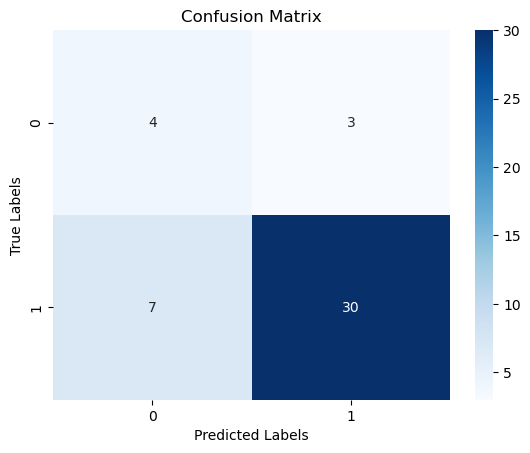

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [43]:
### LOGISTIC REGRESSION USING PTS, FGP, DRB, TOV, FT, AST, PF, Home, FG

In [44]:
X = nba_champs_copy[['PTS','FGP','DRB', 'FT', 'TOV', 'AST', 'PF', 'Home', 'FG']].values
y = nba_champs_copy['Win'].values

In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()

In [47]:
model4.fit(X_train, y_train)

C:\Users\mattr\anaconda3.2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model4.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8636363636363636


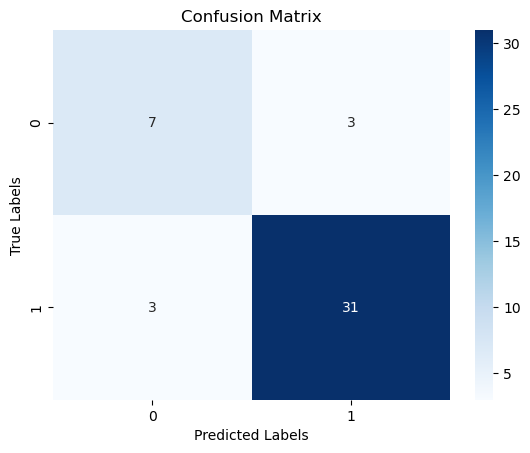

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = model4.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [50]:
### LEARNING HOW TO REGULARIZE DATA

In [51]:
# L1 (Lasso) Regularization

In [58]:
X = nba_champs_copy[['PTS','FGP','DRB', 'FT', 'TOV', 'AST', 'PF', 'Home', 'FG']].values
y = nba_champs_copy['Win'].values

In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with L1 regularization
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)


In [61]:
logistic_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [62]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model (model.fit(X_train, y_train))

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182
